# Boost-hist

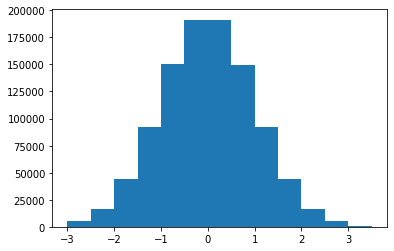

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Make a 1D histogram
plt.hist(np.random.normal(size=1_000_000), np.arange(-3, 4, .5))
plt.savefig("simple_1d.png")

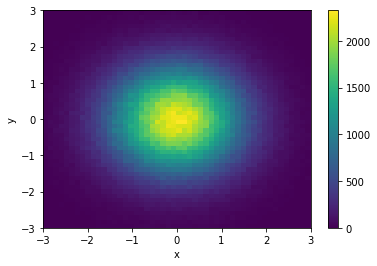

In [2]:
import boost_histogram as bh
import matplotlib.pyplot as plt
import numpy as np

# Create 2d-histogram with two axes with 20 equidistant bins from -3 to 3
h = bh.Histogram(
    bh.axis.Regular(50, -3, 3, metadata="x"), bh.axis.Regular(50, -3, 3, metadata="y")
)

# Generate some Numpy arrays with data to fill into histogram,
# in this case normal distributed random numbers in x and y
x = np.random.randn(1_000_000)
y = np.random.randn(1_000_000)

# Fill histogram with Numpy arrays, this is very fast
h.fill(x, y)

# Get numpy.histogram compatible representation of the histogram
# or create a view of the counts (no copy involved)
w, x, y = h.to_numpy()
# x = h.axes[0].edges
# y = h.axes[1].edges
# w = h.view()

# Draw the count matrix
fig, ax = plt.subplots()
mesh = ax.pcolormesh(x, y, w.T)
ax.set_xlabel(h.axes[0].metadata)
ax.set_ylabel(h.axes[1].metadata)
fig.colorbar(mesh)
plt.savefig("simple_2d.png")

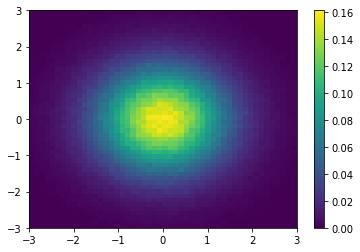

In [3]:
import numpy as np
import boost_histogram as bh
import matplotlib.pyplot as plt

# Make a 2D histogram
hist = bh.Histogram(bh.axis.Regular(50, -3, 3), bh.axis.Regular(50, -3, 3))

# Fill with Gaussian random values
hist.fill(np.random.normal(size=1_000_000), np.random.normal(size=1_000_000))

# Compute the areas of each bin
areas = np.prod(hist.axes.widths, axis=0)

# Compute the density
density = hist.view() / hist.sum() / areas

# Get the edges
X, Y = hist.axes.edges

# Make the plot
fig, ax = plt.subplots()
mesh = ax.pcolormesh(X.T, Y.T, density.T)
fig.colorbar(mesh)
plt.show()

In [4]:
import boost_histogram as bh
import pickle
from pathlib import Path

h1 = bh.Histogram(bh.axis.Regular(2, -1, 1))
h2 = h1.copy()

h1.fill(-0.5)
h2.fill(0.5)

# Arithmetic operators
h3 = h1 + h2
h4 = h3 * 2

print(f"{h4[0]}, {h4[1]}")

h4_saved = Path("h4_saved.pkl")

# Now save the histogram
with h4_saved.open("wb") as f:
    pickle.dump(h4, f, protocol=-1)

# And load
with h4_saved.open("rb") as f:
    h5 = pickle.load(f)

assert h4 == h5
print("Succeeded in pickling a histogram!")

# Delete the file to keep things tidy
h4_saved.unlink()

2.0, 2.0
Succeeded in pickling a histogram!


In [5]:
import boost_histogram as bh

# Make 1-d histogram with 5 logarithmic bins from 1e0 to 1e5
h = bh.Histogram(
    bh.axis.Regular(5, 1e0, 1e5, metadata="x", transform=bh.axis.transform.log),
    storage=bh.storage.Weight(),
)

# Fill histogram with numbers
x = (2e0, 2e1, 2e2, 2e3, 2e4)

# Doing this several times so the variance is more interesting
h.fill(x, weight=1)
h.fill(x, weight=1)
h.fill(x, weight=1)
h.fill(x, weight=1)

# Iterate over bins and access bin counter
for idx, (lower, upper) in enumerate(h.axes[0]):
    val = h[idx]
    print(val)
    print(f"bin {idx} in [{lower:g}, {upper:g}): {val.value} +/- {val.variance**.5}")

WeightedSum(value=4, variance=4)
bin 0 in [1, 10): 4.0 +/- 2.0
WeightedSum(value=4, variance=4)
bin 1 in [10, 100): 4.0 +/- 2.0
WeightedSum(value=4, variance=4)
bin 2 in [100, 1000): 4.0 +/- 2.0
WeightedSum(value=4, variance=4)
bin 3 in [1000, 10000): 4.0 +/- 2.0
WeightedSum(value=4, variance=4)
bin 4 in [10000, 100000): 4.0 +/- 2.0


In [6]:
import boost_histogram as bh

# make 1-d histogram with 5 logarithmic bins from 1e0 to 1e5
h = bh.Histogram(
    bh.axis.Regular(5, 1e0, 1e5, metadata="x", transform=bh.axis.transform.log),
    storage=bh.storage.Weight(),
)

# fill histogram with numbers
x = (2e0, 2e1, 2e2, 2e3, 2e4)
h.fill(x, weight=4)
h.fill(x, weight=4)
h.fill(x, weight=4)
h.fill(x, weight=4)

# iterate over bins and access bin counter
for idx, (lower, upper) in enumerate(h.axes[0]):
    val = h[idx]
    print(
        "bin {0} [{1:g}, {2:g}): {3} +/- {4}".format(
            idx, lower, upper, val.value, val.variance ** 0.5
        )
    )

# under- and overflow bin
lo, up = h.axes[0][bh.underflow]
print(
    "underflow [{0:g}, {1:g}): {2} +/- {3}".format(
        lo, up, h[bh.underflow].value, h[bh.overflow].variance ** 0.5
    )
)
lo, up = h.axes[0][bh.overflow]
print(
    "overflow  [{0:g}, {1:g}): {2} +/- {3}".format(
        lo, up, h[bh.overflow].value, h[bh.overflow].variance ** 0.5
    )
)


bin 0 [1, 10): 16.0 +/- 8.0
bin 1 [10, 100): 16.0 +/- 8.0
bin 2 [100, 1000): 16.0 +/- 8.0
bin 3 [1000, 10000): 16.0 +/- 8.0
bin 4 [10000, 100000): 16.0 +/- 8.0
underflow [0, 1): 0.0 +/- 0.0
overflow  [100000, inf): 0.0 +/- 0.0


In [7]:
h = bh.Histogram(bh.axis.Regular(10,0,1))     # Double() is the default
h.fill([.2, .3], weight=[.5, 2])             # Weights are optional
print(f"{h[bh.loc(.2)]=}\n{h[bh.loc(.2)]=}") # Python 3.8 print

SyntaxError: invalid syntax (<fstring>, line 1)